In [2]:
##pip install geojson

In [3]:
##%conda install folium

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from bs4 import BeautifulSoup
import time # For adding a delay between requests
import random # For randomizing delay
import requests

In [5]:
nash_list = pd.read_csv('../data/listings.csv')

In [6]:
nash_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9585 entries, 0 to 9584
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9585 non-null   int64  
 1   listing_url                                   9585 non-null   object 
 2   scrape_id                                     9585 non-null   int64  
 3   last_scraped                                  9585 non-null   object 
 4   source                                        9585 non-null   object 
 5   name                                          9585 non-null   object 
 6   description                                   9394 non-null   object 
 7   neighborhood_overview                         6214 non-null   object 
 8   picture_url                                   9585 non-null   object 
 9   host_id                                       9585 non-null   i

In [7]:
nash_list[['latitude','longitude']].head(50)

,latitude,longitude
0,36.171430,-86.735700
1,36.124660,-86.812690
2,36.189400,-86.591620
3,36.131220,-86.800660
4,36.160760,-86.591510
5,36.162960,-86.591130
6,36.162360,-86.590050
7,36.175800,-86.799500
8,36.161220,-86.590070
9,36.164990,-86.750540


In [8]:
nash_list.loc[nash_list['minimum_minimum_nights']>=30]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20250315060229,2025-03-15,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.96,4.92,4.98,NaN,f,1,0,1,0,3.46
2,59576,https://www.airbnb.com/rooms/59576,20250315060229,2025-03-15,city scrape,Large Main Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/4e4e34db-3155...,812128,...,5.00,5.00,5.00,NaN,f,6,1,5,0,0.09
4,258817,https://www.airbnb.com/rooms/258817,20250315060229,2025-03-15,city scrape,"ButterflyRoom-queen room, private bath",Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,...,4.91,4.74,4.73,NaN,f,8,0,7,1,0.60
5,289242,https://www.airbnb.com/rooms/289242,20250315060229,2025-03-15,city scrape,"MorningstarHouse, monthly room-",Morningstar House! Extended stay - price reduc...,The Morningstar House is in a quiet cul-de-sac...,https://a0.muscache.com/pictures/40a7ab72-20f7...,22296,...,4.78,4.47,4.69,NaN,f,8,0,7,1,0.47
6,319705,https://www.airbnb.com/rooms/319705,20250315060229,2025-03-15,city scrape,"SuperSweetSTUDIO, jacuzzi, private entrance",Huge fully furnished private room /studio apar...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/3470453/c7d82...,22296,...,4.69,4.63,4.58,NaN,f,8,0,7,1,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9520,1368588735062432547,https://www.airbnb.com/rooms/1368588735062432547,20250315060229,2025-03-15,city scrape,Cozy Downtown Studio On Broadway,Welcome to your modern studio apt home on the ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,492903135,...,NaN,NaN,NaN,NaN,f,4,4,0,0,NaN
9528,1370292228465842647,https://www.airbnb.com/rooms/1370292228465842647,20250315060229,2025-03-15,city scrape,I’m rarely there,Master bedroom on main floor of 2br/2ba townho...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,8962546,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
9554,1373976176884284666,https://www.airbnb.com/rooms/1373976176884284666,20250315060229,2025-03-15,city scrape,"Peaceful, Bright Queen Room | Central & Renovated",Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,21646527,...,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
9567,1374694384021460568,https://www.airbnb.com/rooms/1374694384021460568,20250315060229,2025-03-15,city scrape,Mid-Mod Basement Retreat,NEWLY RENOVATED Modern/contemporary 2 BR/1 BA ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,12774554,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [9]:
nash_review = pd.read_csv('../data/reviews.csv')

In [10]:
minof30ni = nash_list.loc[nash_list['minimum_nights'] >= 30]
minof30ni

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20250315060229,2025-03-15,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.96,4.92,4.98,NaN,f,1,0,1,0,3.46
2,59576,https://www.airbnb.com/rooms/59576,20250315060229,2025-03-15,city scrape,Large Main Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/4e4e34db-3155...,812128,...,5.00,5.00,5.00,NaN,f,6,1,5,0,0.09
4,258817,https://www.airbnb.com/rooms/258817,20250315060229,2025-03-15,city scrape,"ButterflyRoom-queen room, private bath",Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,...,4.91,4.74,4.73,NaN,f,8,0,7,1,0.60
5,289242,https://www.airbnb.com/rooms/289242,20250315060229,2025-03-15,city scrape,"MorningstarHouse, monthly room-",Morningstar House! Extended stay - price reduc...,The Morningstar House is in a quiet cul-de-sac...,https://a0.muscache.com/pictures/40a7ab72-20f7...,22296,...,4.78,4.47,4.69,NaN,f,8,0,7,1,0.47
6,319705,https://www.airbnb.com/rooms/319705,20250315060229,2025-03-15,city scrape,"SuperSweetSTUDIO, jacuzzi, private entrance",Huge fully furnished private room /studio apar...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/3470453/c7d82...,22296,...,4.69,4.63,4.58,NaN,f,8,0,7,1,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9520,1368588735062432547,https://www.airbnb.com/rooms/1368588735062432547,20250315060229,2025-03-15,city scrape,Cozy Downtown Studio On Broadway,Welcome to your modern studio apt home on the ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,492903135,...,NaN,NaN,NaN,NaN,f,4,4,0,0,NaN
9528,1370292228465842647,https://www.airbnb.com/rooms/1370292228465842647,20250315060229,2025-03-15,city scrape,I’m rarely there,Master bedroom on main floor of 2br/2ba townho...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,8962546,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
9554,1373976176884284666,https://www.airbnb.com/rooms/1373976176884284666,20250315060229,2025-03-15,city scrape,"Peaceful, Bright Queen Room | Central & Renovated",Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,21646527,...,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
9567,1374694384021460568,https://www.airbnb.com/rooms/1374694384021460568,20250315060229,2025-03-15,city scrape,Mid-Mod Basement Retreat,NEWLY RENOVATED Modern/contemporary 2 BR/1 BA ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,12774554,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [11]:
len(set(nash_review))

6

In [12]:
minof30ni['minimum_nights'].min()

30

In [13]:
maxminof30ni =minof30ni.loc[minof30ni['minimum_nights'] == 730]
maxminof30ni['price']

2828    NaN
Name: price, dtype: object

In [14]:
nash_neighbors = pd.read_csv('../data/neighbourhoods.csv')
nash_neighbors

,neighbourhood_group,neighbourhood
0,NaN,District 1
1,NaN,District 10
2,NaN,District 11
3,NaN,District 12
4,NaN,District 13
5,NaN,District 14
6,NaN,District 15
7,NaN,District 16
8,NaN,District 17
9,NaN,District 18


In [15]:
##parksgpd['lng'] = parksgpd.geometry.centroid.x
##parksgpd['lat']= parksgpd.geometry.centroid.y
##parksgpd

In [16]:
zillow_list = pd.read_csv('../data/zillow.csv')

In [17]:
zillow_list

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1557.413520,...,2008.322823,2019.510812,2008.990192,1999.000695,1991.831855,1987.133409,1984.396568,1982.530426,1992.511067,1998.326857
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1297.721295,...,1903.201526,1915.814721,1893.354338,1875.355315,1872.596561,1892.674418,1902.553639,1914.897081,1927.398395,1928.312343
2,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,1213.080633,...,1798.527327,1797.622832,1800.911804,1807.872389,1803.258361,1791.416816,1768.558354,1783.547286,1781.959060,1785.311992
3,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1516.142641,1508.063301,1500.805038,1485.205436,1491.904534,1505.402383,1534.994034,1554.616415,1549.810299,1518.400560
4,62093,7,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,2993.317633,2988.242148,2953.951035,2908.311413,2860.673857,2838.826917,2883.699434,2921.008142,2974.454518,2965.071455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,86344,30470,64102,zip,MO,MO,Kansas City,"Kansas City, MO-KS",Jackson County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1589.751960,1586.000000
7318,58956,30490,2876,zip,RI,RI,North Smithfield,"Providence-Warwick, RI-MA",Providence County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2255.910013,2236.505170,2268.402375,2297.222222
7319,61618,30490,10004,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,NaN,...,4563.087965,4534.430074,4483.314883,4403.330101,4371.507238,4329.240618,4359.792613,4475.881316,4530.669700,4618.611111
7320,91179,30490,76005,zip,TX,TX,Arlington,"Dallas-Fort Worth-Arlington, TX",Tarrant County,NaN,...,2030.587629,2007.140006,1978.581956,1921.595885,1940.733714,1915.469691,1919.755958,1900.543381,1907.209568,1921.465368


In [18]:
nash_zillow = zillow_list.loc[zillow_list['City']== 'Nashville']
nash_zillow

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
12,74101,15,37013,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,1119.967929,...,1934.575940,1932.546290,1928.691310,1911.247988,1878.485364,1861.859260,1864.345966,1875.617022,1884.520976,1887.843159
166,74242,176,37211,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,974.183647,...,1558.986481,1548.374318,1526.986090,1503.205083,1496.812194,1503.824173,1509.036065,1515.705622,1512.477114,1530.493139
1657,74178,1740,37115,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,NaN,...,1504.517498,1516.465714,1506.479409,1515.435507,1505.485960,1514.737987,1514.708241,1532.739374,1536.187325,1522.991142
1658,74252,1741,37221,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,NaN,...,1716.398503,1720.305525,1733.220823,1741.535599,1749.034831,1710.217674,1699.698147,1689.237242,1709.447656,1716.247941
1848,74238,1943,37207,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,NaN,...,2204.249611,2185.810457,2181.963035,2161.386301,2150.777045,2174.060029,2180.251483,2188.925953,2186.900959,2220.505556
2057,74157,2166,37076,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,NaN,...,1632.530846,1640.629799,1637.274732,1605.828035,1597.222447,1597.237315,1615.603384,1625.691698,1639.552714,1650.986555
2455,74240,2594,37209,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,NaN,...,1875.479063,1888.072606,1873.094818,1874.974533,1857.869017,1869.548847,1845.920267,1840.603366,1826.655239,1832.551307
2981,74248,3187,37217,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,NaN,...,1569.125785,1562.404350,1552.364713,1534.223049,1542.992354,1524.948233,1514.992987,1502.046505,1516.166359,1533.345303
3135,74245,3360,37214,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,NaN,...,1663.871248,1677.739514,1671.397646,1658.844502,1628.894733,1618.672989,1623.993137,1637.291221,1666.188025,1671.495252
3923,74195,4310,37138,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,NaN,...,2160.961860,2138.543989,2094.676884,2068.799277,2092.204702,2148.245754,2155.067420,2173.084371,2160.086058,2149.704762


In [19]:
zillow_list.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 133 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    RegionID    7322 non-null   int64  
 1    SizeRank    7322 non-null   int64  
 2    RegionName  7322 non-null   int64  
 3    RegionType  7322 non-null   object 
 4    StateName   7322 non-null   object 
 5    State       7322 non-null   object 
 6    City        7270 non-null   object 
 7    Metro       7301 non-null   object 
 8    CountyName  7322 non-null   object 
 9    2015-01-31  809 non-null    float64
 10   2015-02-28  838 non-null    float64
 11   2015-03-31  893 non-null    float64
 12   2015-04-30  909 non-null    float64
 13   2015-05-31  924 non-null    float64
 14   2015-06-30  926 non-null    float64
 15   2015-07-31  933 non-null    float64
 16   2015-08-31  936 non-null    float64
 17   2015-09-30  939 non-null    float64
 18   2015-10-31  945 non-null    float64
 19   2015

In [20]:
incidents = pd.read_csv('../data/incidents.csv')

/var/folders/xm/zcj7d6494pd3w3f_ptrhh9lr0000gn/T/ipykernel_58927/2519731668.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents = pd.read_csv('../data/incidents.csv')


In [21]:
latnlongairbnb = pd.read_csv('../data/latnlongairbnb.csv')
latnlongairbnb

,Unnamed: 0,latitude,longitude
0,0,36.171430,-86.735700
1,2,36.189400,-86.591620
2,4,36.160760,-86.591510
3,5,36.162960,-86.591130
4,6,36.162360,-86.590050
...,...,...,...
1201,9520,36.157534,-86.787267
1202,9528,36.164556,-86.700676
1203,9554,36.051758,-86.727273
1204,9567,36.180546,-86.817324


In [22]:
# Set up geolocator
##geolocator = Nominatim(user_agent="zip_code_lookup")
##reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# Function to get ZIP code from coordinates
##def get_zipcode(lat, lon):
  #  try:
   #     location = reverse((lat, lon), exactly_one=True)
    #    if location and 'postcode' in location.raw['address']:
     #       return location.raw['address']['postcode']
    #except:
     #   return None
    #return None

# Apply to dataframe
#minof30ni['zipcode'] = minof30ni.apply(
 #   lambda row: get_zipcode(row['latitude'], row['longitude']) if pd.notnull(row['latitude']) and pd.notnull(row['longitude']) else None,
  #  axis=1
#)

# Save updated file
#output_file = "minof30ni_with_zip.csv"
#minof30ni.to_csv(output_file, index=False)
#print(f"ZIP codes added. File saved as {output_file}")

In [23]:
min30ni_zip = pd.read_csv('../data/minof30ni_with_zip.csv')

In [24]:
min30ni_zip

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,zipcode
0,6422,https://www.airbnb.com/rooms/6422,20250315060229,2025-03-15,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.92,4.98,NaN,f,1,0,1,0,3.46,37206.0
1,59576,https://www.airbnb.com/rooms/59576,20250315060229,2025-03-15,city scrape,Large Main Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/4e4e34db-3155...,812128,...,5.00,5.00,NaN,f,6,1,5,0,0.09,37076.0
2,258817,https://www.airbnb.com/rooms/258817,20250315060229,2025-03-15,city scrape,"ButterflyRoom-queen room, private bath",Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,...,4.74,4.73,NaN,f,8,0,7,1,0.60,37076.0
3,289242,https://www.airbnb.com/rooms/289242,20250315060229,2025-03-15,city scrape,"MorningstarHouse, monthly room-",Morningstar House! Extended stay - price reduc...,The Morningstar House is in a quiet cul-de-sac...,https://a0.muscache.com/pictures/40a7ab72-20f7...,22296,...,4.47,4.69,NaN,f,8,0,7,1,0.47,37076.0
4,319705,https://www.airbnb.com/rooms/319705,20250315060229,2025-03-15,city scrape,"SuperSweetSTUDIO, jacuzzi, private entrance",Huge fully furnished private room /studio apar...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/3470453/c7d82...,22296,...,4.63,4.58,NaN,f,8,0,7,1,0.31,37076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,1368588735062432547,https://www.airbnb.com/rooms/1368588735062432547,20250315060229,2025-03-15,city scrape,Cozy Downtown Studio On Broadway,Welcome to your modern studio apt home on the ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,492903135,...,NaN,NaN,NaN,f,4,4,0,0,NaN,37203.0
1279,1370292228465842647,https://www.airbnb.com/rooms/1370292228465842647,20250315060229,2025-03-15,city scrape,I’m rarely there,Master bedroom on main floor of 2br/2ba townho...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,8962546,...,NaN,NaN,NaN,f,1,0,1,0,NaN,37214.0
1280,1373976176884284666,https://www.airbnb.com/rooms/1373976176884284666,20250315060229,2025-03-15,city scrape,"Peaceful, Bright Queen Room | Central & Renovated",Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,21646527,...,NaN,NaN,NaN,t,2,1,1,0,NaN,37211.0
1281,1374694384021460568,https://www.airbnb.com/rooms/1374694384021460568,20250315060229,2025-03-15,city scrape,Mid-Mod Basement Retreat,NEWLY RENOVATED Modern/contemporary 2 BR/1 BA ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,12774554,...,NaN,NaN,NaN,f,1,1,0,0,NaN,37208.0


In [25]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902934 entries, 0 to 902933
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   X                            894181 non-null  float64
 1   Y                            894181 non-null  float64
 2   OBJECTID                     902934 non-null  int64  
 3   Primary_Key                  902934 non-null  object 
 4   Incident_Number              902934 non-null  int64  
 5   Report_Type                  902817 non-null  object 
 6   Report_Type_Description      838580 non-null  object 
 7   Incident_Status_Code         902857 non-null  object 
 8   Incident_Status_Description  902832 non-null  object 
 9   Investigation_Status         902934 non-null  object 
 10  Incident_Location            896893 non-null  object 
 11  Latitude                     894181 non-null  float64
 12  Longitude                    894181 non-null  float64
 13 

In [26]:
incidents['ZIP_Code'].unique()

array([nan, 37115.0, 37210.0, 37203.0, 37208.0, 37211.0, 37013.0, 37206.0,
       37217.0, 37214.0, 37219.0, 37213.0, 37212.0, 37138.0, 37218.0,
       37072.0, 37207.0, 37228.0, 37209.0, 37216.0, 37076.0, 37201.0,
       37215.0, 37204.0, 37062.0, 37205.0, 37221.0, 37189.0, 37220.0,
       37027.0, 37080.0, 37015.0, 37240.0, 37135.0, 37110.0, 37232.0,
       15213.0, 37122.0, 37143.0, 37075.0, 37167.0, 43440.0, 39202.0,
       37066.0, 37086.0, 37043.0, 37064.0, 37049.0, 90069.0, 19153.0,
       37129.0, 37029.0, 0.0, 37087.0, 37683.0, 37028.0, 3701.0, 27707.0,
       37130.0, 6706.0, 27216.0, 89502.0, 38562.0, 30139.0, 37185.0,
       37082.0, 91107.0, 37330.0, 37078.0, 37274.0, 30318.0, 32801.0,
       38401.0, 23236.0, '37207', '37209', '37013.0', '37013', '37138.0',
       '37221', '37076', '37217.0', '37203', '37207.0', '37214',
       '37076.0', '37210.0', '37211.0', '37211', '37221.0', '37209.0',
       '37213', '37115.0', '37204', '37215', '37214.0', '37115', '37210',
       '

In [27]:
min30ni_zip['zipcode'].unique()

array([37206., 37076., 37212., 37214., 37216., 37204., 37205., 37213.,
       37027., 37138., 37210., 37208., 37211., 37217., 37115., 37220.,
       37209., 37203., 37072., 37207., 31138., 37013., 37221., 37011.,
       37219., 37215., 37080., 37086., 37218., 37299., 37189., 37236.,
       37235., 37243.,    nan, 37240., 37015., 37201., 37152., 37202.])

In [28]:
nash_zillow['RegionName'].unique()

array([37013, 37211, 37115, 37221, 37207, 37076, 37209, 37217, 37214,
       37138, 37205, 37206, 37215, 37203, 37216, 37212, 37208, 37204,
       37210, 37218, 37228, 37201, 37219])

In [29]:
nash_min30 = min30ni_zip[min30ni_zip['zipcode'].isin(nash_zillow['RegionName'])]
nash_min30['zipcode'].unique()

array([37206., 37076., 37212., 37214., 37216., 37204., 37205., 37138.,
       37210., 37208., 37211., 37217., 37115., 37209., 37203., 37207.,
       37013., 37221., 37219., 37215., 37218., 37201.])

In [30]:
nash_min30

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,zipcode
0,6422,https://www.airbnb.com/rooms/6422,20250315060229,2025-03-15,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.92,4.98,NaN,f,1,0,1,0,3.46,37206.0
1,59576,https://www.airbnb.com/rooms/59576,20250315060229,2025-03-15,city scrape,Large Main Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/4e4e34db-3155...,812128,...,5.00,5.00,NaN,f,6,1,5,0,0.09,37076.0
2,258817,https://www.airbnb.com/rooms/258817,20250315060229,2025-03-15,city scrape,"ButterflyRoom-queen room, private bath",Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,...,4.74,4.73,NaN,f,8,0,7,1,0.60,37076.0
3,289242,https://www.airbnb.com/rooms/289242,20250315060229,2025-03-15,city scrape,"MorningstarHouse, monthly room-",Morningstar House! Extended stay - price reduc...,The Morningstar House is in a quiet cul-de-sac...,https://a0.muscache.com/pictures/40a7ab72-20f7...,22296,...,4.47,4.69,NaN,f,8,0,7,1,0.47,37076.0
4,319705,https://www.airbnb.com/rooms/319705,20250315060229,2025-03-15,city scrape,"SuperSweetSTUDIO, jacuzzi, private entrance",Huge fully furnished private room /studio apar...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/3470453/c7d82...,22296,...,4.63,4.58,NaN,f,8,0,7,1,0.31,37076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,1368588735062432547,https://www.airbnb.com/rooms/1368588735062432547,20250315060229,2025-03-15,city scrape,Cozy Downtown Studio On Broadway,Welcome to your modern studio apt home on the ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,492903135,...,NaN,NaN,NaN,f,4,4,0,0,NaN,37203.0
1279,1370292228465842647,https://www.airbnb.com/rooms/1370292228465842647,20250315060229,2025-03-15,city scrape,I’m rarely there,Master bedroom on main floor of 2br/2ba townho...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,8962546,...,NaN,NaN,NaN,f,1,0,1,0,NaN,37214.0
1280,1373976176884284666,https://www.airbnb.com/rooms/1373976176884284666,20250315060229,2025-03-15,city scrape,"Peaceful, Bright Queen Room | Central & Renovated",Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,21646527,...,NaN,NaN,NaN,t,2,1,1,0,NaN,37211.0
1281,1374694384021460568,https://www.airbnb.com/rooms/1374694384021460568,20250315060229,2025-03-15,city scrape,Mid-Mod Basement Retreat,NEWLY RENOVATED Modern/contemporary 2 BR/1 BA ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,12774554,...,NaN,NaN,NaN,f,1,1,0,0,NaN,37208.0


In [31]:
nash_min30 = nash_min30.drop(columns='price')

In [32]:
price_for_rent = pd.read_csv('../data/price_per30ni.csv')

In [33]:
price_for_rent['id'] = price_for_rent['id'].astype(int)

In [34]:
price_min_30ni = pd.merge(nash_min30, price_for_rent, on=['id','minimum_nights'], how='left')

In [35]:
price_min_30ni

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,zipcode,price,price_min_stay
0,6422,https://www.airbnb.com/rooms/6422,20250315060229,2025-03-15,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,NaN,f,1,0,1,0,3.46,37206.0,43,1290.0
1,59576,https://www.airbnb.com/rooms/59576,20250315060229,2025-03-15,city scrape,Large Main Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/4e4e34db-3155...,812128,...,NaN,f,6,1,5,0,0.09,37076.0,53,1590.0
2,258817,https://www.airbnb.com/rooms/258817,20250315060229,2025-03-15,city scrape,"ButterflyRoom-queen room, private bath",Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,...,NaN,f,8,0,7,1,0.60,37076.0,34,1020.0
3,289242,https://www.airbnb.com/rooms/289242,20250315060229,2025-03-15,city scrape,"MorningstarHouse, monthly room-",Morningstar House! Extended stay - price reduc...,The Morningstar House is in a quiet cul-de-sac...,https://a0.muscache.com/pictures/40a7ab72-20f7...,22296,...,NaN,f,8,0,7,1,0.47,37076.0,33,990.0
4,319705,https://www.airbnb.com/rooms/319705,20250315060229,2025-03-15,city scrape,"SuperSweetSTUDIO, jacuzzi, private entrance",Huge fully furnished private room /studio apar...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/3470453/c7d82...,22296,...,NaN,f,8,0,7,1,0.31,37076.0,45,1350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1368588735062432547,https://www.airbnb.com/rooms/1368588735062432547,20250315060229,2025-03-15,city scrape,Cozy Downtown Studio On Broadway,Welcome to your modern studio apt home on the ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,492903135,...,NaN,f,4,4,0,0,NaN,37203.0,NaN,NaN
1201,1370292228465842647,https://www.airbnb.com/rooms/1370292228465842647,20250315060229,2025-03-15,city scrape,I’m rarely there,Master bedroom on main floor of 2br/2ba townho...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,8962546,...,NaN,f,1,0,1,0,NaN,37214.0,NaN,NaN
1202,1373976176884284666,https://www.airbnb.com/rooms/1373976176884284666,20250315060229,2025-03-15,city scrape,"Peaceful, Bright Queen Room | Central & Renovated",Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,21646527,...,NaN,t,2,1,1,0,NaN,37211.0,NaN,NaN
1203,1374694384021460568,https://www.airbnb.com/rooms/1374694384021460568,20250315060229,2025-03-15,city scrape,Mid-Mod Basement Retreat,NEWLY RENOVATED Modern/contemporary 2 BR/1 BA ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,12774554,...,NaN,f,1,1,0,0,NaN,37208.0,NaN,NaN


In [36]:
price_min_30ni['price_min_stay'].mean()

2844.824200913242

In [37]:
price_min_30ni['zipcode'].value_counts()

zipcode
37206.0    119
37203.0    108
37211.0    107
37207.0     96
37216.0     94
37214.0     85
37209.0     85
37212.0     80
37208.0     74
37217.0     61
37076.0     48
37210.0     41
37013.0     39
37115.0     38
37205.0     32
37204.0     29
37138.0     21
37215.0     18
37218.0     14
37221.0      8
37219.0      5
37201.0      3
Name: count, dtype: int64

In [38]:
zip_avg = price_min_30ni.groupby('zipcode')['price_min_stay'].mean().reset_index()
#zip_avg.to_excel('zip_avg.xlsx')
zip_avg.sort_values(by='zipcode')


,zipcode,price_min_stay
0,37013.0,3686.176471
1,37076.0,1493.720000
2,37115.0,2224.181818
3,37138.0,11234.555556
4,37201.0,NaN
5,37203.0,6094.800000
6,37204.0,6660.000000
7,37205.0,2834.769231
8,37206.0,1418.875000
9,37207.0,1624.090909


In [39]:
zill_zipcode_avg = nash_zillow[['RegionName','2025-04-30']].reset_index()
#zill_zipcode_avg.to_excel('zill_zipcode_avg.xlsx')
zill_zipcode_avg.sort_values(by='RegionName')

,index,RegionName,2025-04-30
0,12,37013,1887.843159
5,2057,37076,1650.986555
2,1657,37115,1522.991142
9,3923,37138,2149.704762
21,7305,37201,2015.583333
13,5140,37203,2082.809707
17,5774,37204,1896.734106
10,3996,37205,2122.547222
11,4108,37206,2305.004224
4,1848,37207,2220.505556


In [40]:
incidents_nash = incidents[incidents['ZIP_Code'].isin(nash_zillow['RegionName'])]
incidents_nash['ZIP_Code'].value_counts()

ZIP_Code
37207.0    47128
37013.0    46688
37211.0    43655
37115.0    38022
37203.0    28349
37210.0    26853
37208.0    25518
37217.0    23714
37206.0    22902
37209.0    22267
37214.0    21049
37076.0    20443
37201.0    13733
37218.0    11882
37221.0    10526
37216.0    10005
37212.0     6484
37138.0     6146
37204.0     5789
37219.0     5465
37205.0     5297
37215.0     4466
37228.0     3001
Name: count, dtype: int64

In [41]:
price_min_30ni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1205 non-null   int64  
 1   listing_url                                   1205 non-null   object 
 2   scrape_id                                     1205 non-null   int64  
 3   last_scraped                                  1205 non-null   object 
 4   source                                        1205 non-null   object 
 5   name                                          1205 non-null   object 
 6   description                                   1199 non-null   object 
 7   neighborhood_overview                         617 non-null    object 
 8   picture_url                                   1205 non-null   object 
 9   host_id                                       1205 non-null   i

In [42]:
hosts = price_min_30ni[['id','host_id','host_name','host_total_listings_count','price_min_stay','license']]
hosts.sort_values(by='price_min_stay',ascending=False).head(50)

,id,host_id,host_name,host_total_listings_count,price_min_stay,license
424,53643359,85360355,StayLocal,378,80850.0,NaN
132,23824127,85360355,StayLocal,378,76110.0,NaN
194,33912398,17595448,Julie,3,60000.0,NaN
295,45673261,85360355,StayLocal,378,50850.0,NaN
22,5102074,26248043,Jason,1,49500.0,NaN
343,49776927,31304728,Mike,1,25740.0,NaN
254,42042939,94971287,Nick,1,18000.0,NaN
223,38220093,41207602,Belinda,13,17880.0,NaN
253,41964195,62094277,Jim,1,17820.0,NaN
434,54341170,14448697,Che,14,17040.0,NaN


In [43]:
hosts.sort_values(by='host_total_listings_count',ascending=False).dropna(subset='price_min_stay').head(50)

,id,host_id,host_name,host_total_listings_count,price_min_stay,license
261,42667754,121235121,Evolve,1990,3480.0,NaN
277,44099809,101426897,Host Extraordinaires,431,3210.0,NaN
132,23824127,85360355,StayLocal,378,76110.0,NaN
181,32139837,85360355,StayLocal,378,0.0,NaN
266,43067008,85360355,StayLocal,378,0.0,NaN
249,41764780,85360355,StayLocal,378,0.0,NaN
295,45673261,85360355,StayLocal,378,50850.0,NaN
298,45786580,85360355,StayLocal,378,0.0,NaN
241,41205876,85360355,StayLocal,378,2370.0,NaN
424,53643359,85360355,StayLocal,378,80850.0,NaN


In [44]:
under_avg = zip_avg.loc[zip_avg['price_min_stay']< 2844].reset_index()
under_avg

,index,zipcode,price_min_stay
0,1,37076.0,1493.720000
1,2,37115.0,2224.181818
2,7,37205.0,2834.769231
3,8,37206.0,1418.875000
4,9,37207.0,1624.090909
5,10,37208.0,1346.842105
6,12,37210.0,1110.357143
7,13,37211.0,2599.848485
8,14,37212.0,2628.409091
9,15,37214.0,2509.187500


In [45]:
over_avg = zip_avg.loc[zip_avg['price_min_stay']> 2844].reset_index()
over_avg

,index,zipcode,price_min_stay
0,0,37013.0,3686.176471
1,3,37138.0,11234.555556
2,5,37203.0,6094.800000
3,6,37204.0,6660.000000
4,11,37209.0,5026.607143
5,16,37215.0,24700.000000
6,21,37221.0,5070.000000


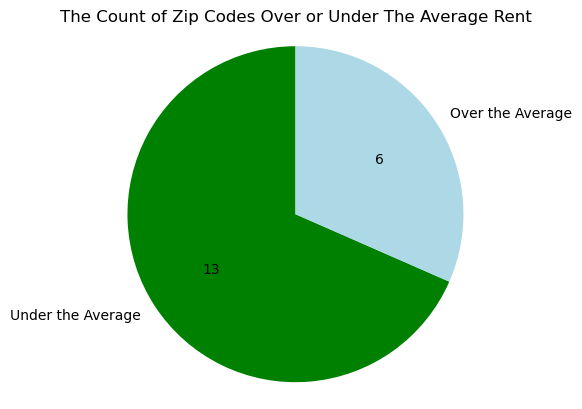

In [46]:
values = np.array([13,6])
labels = ['Under the Average','Over the Average' ]
colors = ['purple','lightpurple']
plt.pie(values, labels=labels, autopct=lambda x: '{:.0f}'.format(x * sum(values) / 100),colors=colors, startangle=90)
plt.title('The Count of Zip Codes Over or Under The Average Rent')
plt.axis('equal')
##plt.savefig('pichart.jpg')
plt.show()


In [47]:
under_avg_inci = incidents[incidents['ZIP_Code'].isin(under_avg['zipcode'])]
top10_inc_under = under_avg_inci['Offense_Description'].value_counts().head(10)

Offense_Description
POLICE INQUIRY                      109385
SIMPLE ASSLT                         24157
FOUND PROPERTY                       16965
LOST PROPERTY                        16008
RECOVERY, STOLEN PROPERTY            14515
TRANSPORT                             9306
DRUG PARAPHERNALIA- UNLAWFUL USE      8946
ASSAULT- FEAR OF BODILY INJURY        8868
DAMAGE PROP - PRIVATE                 7670
WEAPON OFFENSE, CRIMINAL ATTEMPT      7196
Name: count, dtype: int64

In [ ]:
top10_inc_under.to_excel('top10_inc_under.xlsx')

In [ ]:
over_avg_inc = incidents[incidents['ZIP_Code'].isin(over_avg['zipcode'])]
top10_inc_over = over_avg_inc['Offense_Description'].value_counts().head(10)

In [ ]:
top10_inc_over.to_excel('top10_inc_over.xlsx')

In [ ]:
nash_list['price']=nash_list['price'].str.replace('$','').str.replace('.00','')
nash_list['price']=pd.to_numeric(nash_list['price'], errors='coerce')


In [ ]:
max_2ni=nash_list
max_2ni['price'] = nash_list['price']*30
max_2ni = max_2ni.loc[~((max_2ni['price'] ==0))]


In [ ]:
max_2ni['price'].max()

In [ ]:
max_price = max_2ni.loc[max_2ni['price'].idxmax()]
max_price

In [ ]:
id31715199 = max_2ni.loc[max_2ni['id'] == 31715199]
id31715199['maximum_nights']

In [ ]:
min_2ni = max_2ni
min_2ni['price'].min()

In [ ]:
min_price = max_2ni.loc[max_2ni['price'].idxmin()]
min_price

In [ ]:
id1288714875471730 = max_2ni.loc[max_2ni['id'] == 1288714875471730496]
id1288714875471730['maximum_nights']

In [ ]:
##price_min_30ni.to_excel('price_min_30.xlsx')

In [ ]:
price_min_30ni.info()